<img src="../../../images/banners/seaborn.png" width="500"/>

<a class="anchor" id="visualizing_categorical_data"></a>
# <img src="../../../images/logos/seaborn.png" width="23"/>  Project: Iris Dataset

## <img src="../../../images/logos/toc.png" width="20"/> Table of Contents 
* [Question and Problem Definition](#)
* [Acquire Data](#)
* [Analyze by Describing Data (Descriptive Statistics)](#)
* [Analyze by Visualizing Data](#)
* [Pandas Profiling](#)

---

## Question and Problem Definition

The Iris dataset was used in R.A. Fisher's classic 1936 paper, [The Use of Multiple Measurements in Taxonomic Problems](http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf), and can also be found on the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/).

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

- `Id`
- `SepalLengthCm`
- `SepalWidthCm`
- `PetalLengthCm`
- `PetalWidthCm`
- `Species`

## Acquire Data

The Python Seaborn and Pandas packages helps us work with our datasets.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# You can set rcParams for seaborn plots
# custom_rcparams = {"figure.dpi": 300, 'figure.figsize': (6, 4)}

sns.set_theme(
    style='whitegrid',
    font_scale=1.2,
    # rc=custom_rcparams,
)

In [3]:
df = sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Analyze by Describing Data (Descriptive Statistics)

Pandas also helps describe the datasets answering following questions early in our project.

- Which features are available in the dataset?

In [5]:
df.columns.values

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'], dtype=object)

## Check Data Types

<img src="../images/levels-of-measurement.png" width="400"/>

<img src="../images/Ratio Interval Ordinal Nominal.png" width="400"/>

In [6]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
# check on object dtypes and convert them to appropriate data type
df.select_dtypes('object').columns

Index(['species'], dtype='object')

- Which features are categorical?

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.
- Nominal:
    - `species`

In [8]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='count', ylabel='species'>

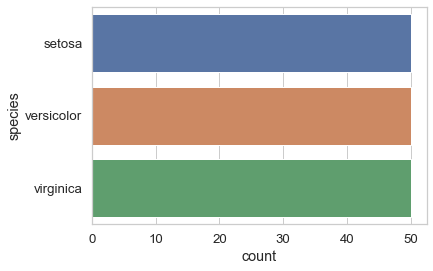

In [9]:
sns.countplot(
    data=df,
    y='species',
)

In [10]:
df = df.astype(
    {
        'species': 'category',
    }
)

- What is the distribution of numerical feature values across the samples?

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Analyze by Visualizing Data

Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

**Correlating Numerical Features:**

Let us start by understanding correlations between numerical features and our solution goal (Species).

A histogram chart is useful for analyzing continous numerical variables like Sepal Length where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

**Observations:**

- Different parts length can help us identify the species.

In [12]:
df.select_dtypes('number').columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

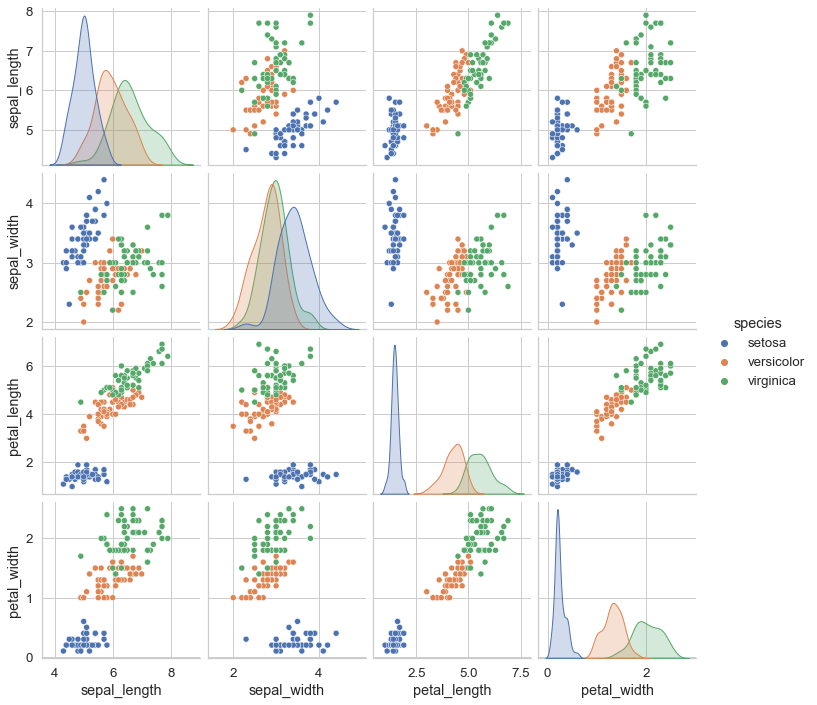

In [13]:
sns.pairplot(df, hue='species')

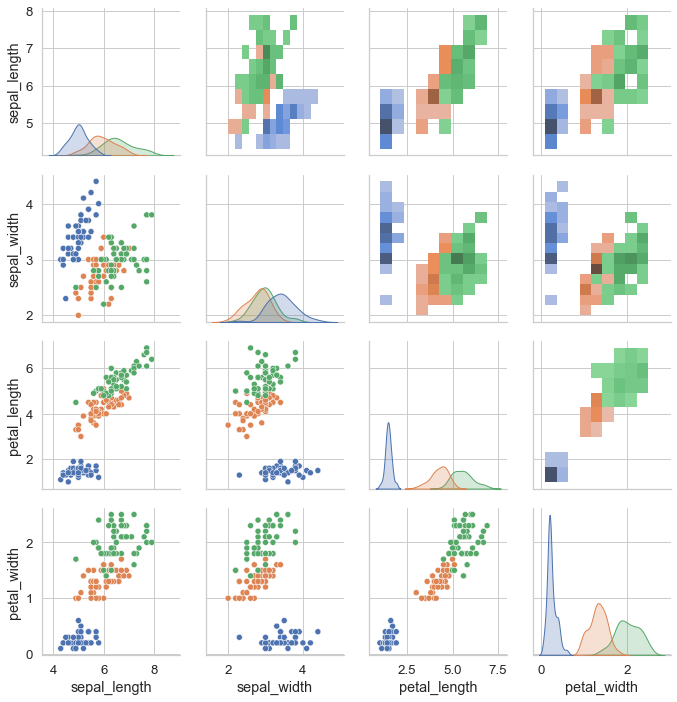

In [14]:
g = sns.PairGrid(df, hue='species')
g.map_upper(sns.histplot)
g.map_diag(sns.kdeplot, fill=True)
g.map_lower(sns.scatterplot)

**Decisions:**

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

- We should consider all numerical features for species classification task.

**Correlations Heatmap:**

<AxesSubplot:>

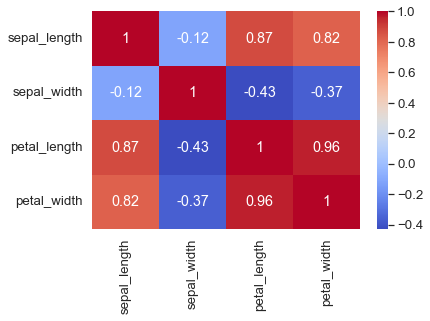

In [15]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

You can draw a better plot with a little bit of customization and creativity:

In [16]:
def corr_plot(df):
    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(6, 4))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    ax = sns.heatmap(
        corr,
        mask=mask,
        cmap=cmap,
        vmax=1, vmin=-1,
        center=0,
        square=True,
        linewidths=.5,
        cbar_kws={"shrink": .5},
        annot=True,
    )
    
    return ax

<AxesSubplot:>

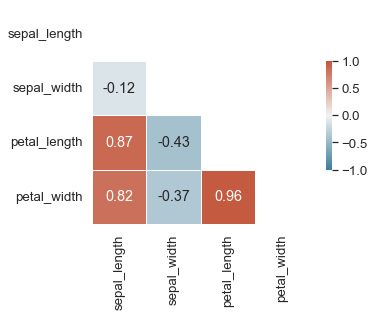

In [17]:
corr_plot(df)

## Pandas Profiling

In [18]:
# !pip install -U pandas-profiling

In [19]:
from pandas_profiling import ProfileReport

In [20]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [21]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
profile.to_file("iris_report.html")
profile.to_file("iris_report.json")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]